File to show the concatenated data set and also the result of stratified sampling

In [14]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
# Load the CSV file into a DataFrame
training_dataset = pd.read_csv('./dataset/customer_churn_dataset-training-master.csv')
testing_dataset = pd.read_csv('./dataset/customer_churn_dataset-testing-master.csv')
# Display the first 5 rows of the DataFrame
# print(df1.head())
# print(df1.columns)
df = pd.concat([training_dataset, testing_dataset], ignore_index=True)
df.drop(199295, inplace=True) #drops the one null column
df.head(50)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [16]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
print(f'Columns: {df.columns}')
nan_count

Columns: Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [17]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)
df.columns

Index(['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

Feature Engineering
Converting object types to int types using one hot encoding

In [18]:
df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [19]:
#Correlation matrix for each feature in relation to the label Churn
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted


Churn                         1.00000
Support Calls                 0.51628
Contract Length_Monthly       0.36650
Payment Delay                 0.32978
Age                           0.19122
Last Interaction              0.12715
Subscription Type_Basic       0.01911
Subscription Type_Standard   -0.00793
Subscription Type_Premium    -0.01101
Tenure                       -0.02131
Usage Frequency              -0.05326
Contract Length_Annual       -0.15271
Contract Length_Quarterly    -0.15635
Total Spend                  -0.36968
Name: Churn, dtype: float64

In [20]:
#grabs any random sample above age 50 to show that they always churn when age is above 50
df[df['Age']>50].sample(n=10)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
84182,51.0,11.0,6.0,9.0,30.0,400.00,29.0,1.0,False,False,True,False,False,True
454833,57.0,28.0,21.0,2.0,20.0,370.00,17.0,0.0,False,True,False,False,False,True
164067,56.0,15.0,24.0,5.0,0.0,403.00,26.0,1.0,False,False,True,False,True,False
478773,56.0,25.0,4.0,1.0,27.0,929.00,4.0,0.0,False,False,True,False,False,True
486587,52.0,57.0,22.0,9.0,29.0,462.00,10.0,1.0,False,False,True,False,False,True
91871,56.0,40.0,30.0,10.0,9.0,774.00,18.0,1.0,False,True,False,True,False,False
71495,55.0,20.0,10.0,10.0,1.0,691.00,19.0,1.0,True,False,False,True,False,False
253486,57.0,52.0,27.0,6.0,28.0,144.01,2.0,1.0,False,False,True,True,False,False
92763,52.0,46.0,16.0,6.0,7.0,322.00,12.0,1.0,False,False,True,True,False,False
35253,57.0,10.0,4.0,8.0,29.0,403.00,8.0,1.0,True,False,False,False,True,False


<Axes: xlabel='Age', ylabel='Churn'>

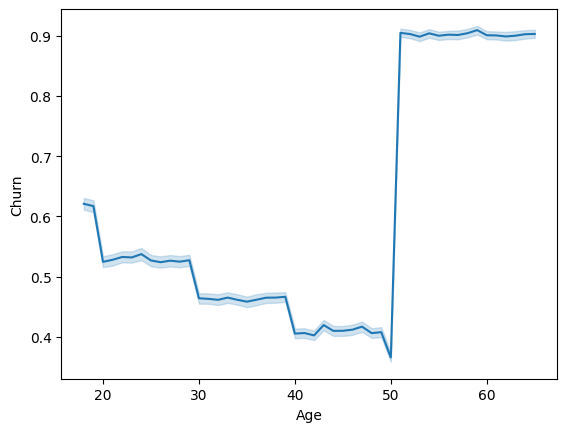

In [21]:
sns.lineplot(x=df['Age'], y=df['Churn'])